In [3]:
import sys
from pathlib import Path
import pandas as pd

ROOT = Path.cwd().parents[1] 
sys.path.append(str(ROOT / "src"))

df = pd.read_csv("../../data/wineQT.csv")

In [4]:
# compute correlation matrix
corrMatrix = df.corr(numeric_only=True)
corrMatrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


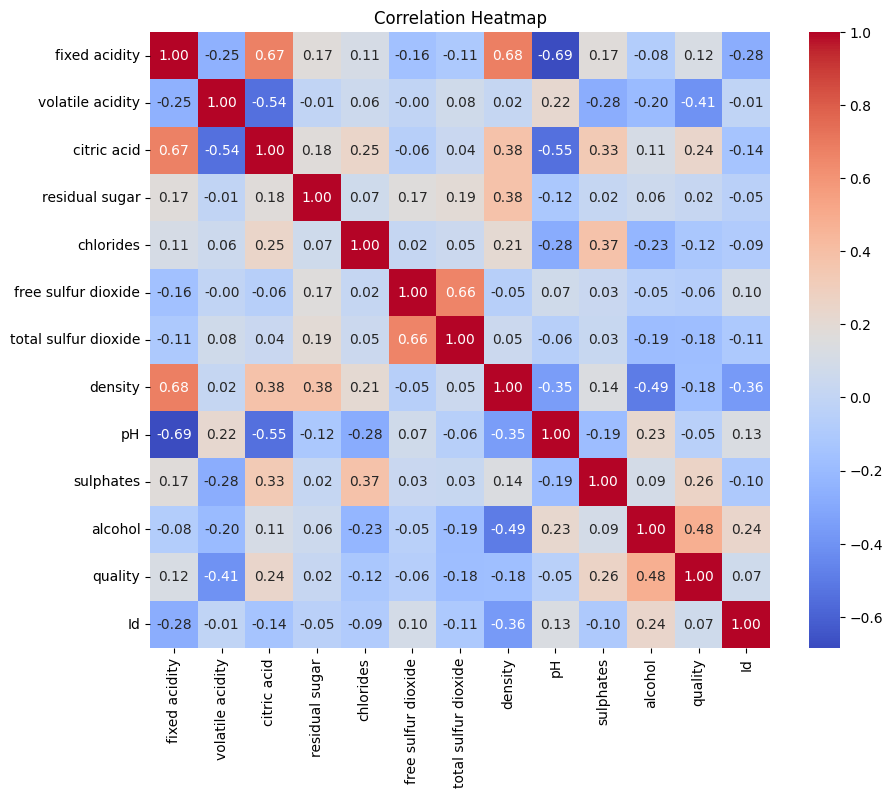

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")

plt.savefig("../figures/correlationHeatmap.png", bbox_inches='tight')

plt.show()





In [16]:
corr_with_quality = corr["quality"].drop("quality")
corr_sorted = corr_with_quality.sort_values(ascending=False)

print("Most positive correlation with quality:")
print(corr_sorted.head(1))

print("\nMost negative correlation with quality:")
print(corr_sorted.tail(1))



Most positive correlation with quality:
alcohol    0.484866
Name: quality, dtype: float64

Most negative correlation with quality:
volatile acidity   -0.407394
Name: quality, dtype: float64


Alcohole will be a better predictor of quality than pH, because it has a stronger positive correlation with quality (0.48) compared to pH's negative correlation (-0.05).